# Aprendizaje Supervisado II
## Taller 3


*   1. K-vecinos más cercanos
*   2. Otros clasificadores
*   3. Selección de modelos: grid search
*   4. Preprocesamiento
*   5. Reducción de dimensionalidad
*   6. Pipeline
*   7. Multi clase



---

Sklearn ofrece tambien diferentes dataset de fácil acceso. Pueden verlos [aca](https://scikit-learn.org/stable/datasets/index.html)



In [161]:
import sklearn
from sklearn.datasets import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
# % matplotlib inline

## 1. K-vecinos más cercanos

1.1 Complete la siguiente clase para implementar K vecinos mas cercanos

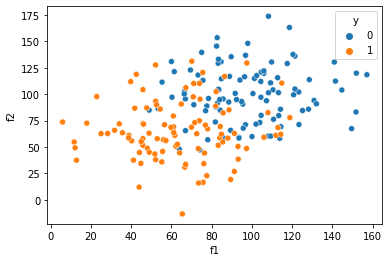

In [162]:
clase_0= pd.DataFrame({'f1':np.random.normal(loc=100, scale=25, size=100), 'f2':np.random.normal(loc=100, scale=25, size=100)})
clase_1= pd.DataFrame({'f1':np.random.normal(loc=65, scale=25, size=100), 'f2':np.random.normal(loc=65, scale=25, size=100)})
clase_0['y'] = 0
clase_1['y'] = 1
data=pd.concat([clase_0, clase_1], axis = 0)
# data.sample(5)
sns.scatterplot(x = data['f1'], y = data['f2'], hue = data['y']);

In [163]:


X_train,X_test,y_train,y_test = train_test_split(data.drop('y', axis=1),data.y, shuffle=True)

In [164]:
from ast import Break
from matplotlib.pyplot import axes
from regex import B

class Kvecinos():
  def __init__(self,k):
    self.scaler = sklearn.preprocessing.StandardScaler
    self.distance_func = np.linalg.norm
    self.is_trained = False
    self.k = k
    #TODO: completar si falta algo

  def fit(self,X,y):
    self.X = X.copy()
    self.y = y.copy()
    self.scaler = self.scaler().fit(self.X)
    
  """
  Funcion que toma un np.array X de N x M
  y devuelve otro np.array de tamano (N,) con 
  la predicción para cada uno de las N instancias
  """
  def predict(self, Xtest):
    self.X = pd.DataFrame(self.scaler.transform(self.X), index = self.X.index)
    self.Xtest = np.array(self.scaler.transform(Xtest.copy()))
    distancias_by_row = {}
    predict_list = []
    
    for row_test in range(self.Xtest.shape[0]):
      distancias_by_row = (self.Xtest[row_test] - self.X).apply(lambda x: self.distance_func(x), axis = 1)
      indices_botantes = pd.DataFrame(distancias_by_row).sort_values(ascending= True, by=0)[:self.k].index
      predict_list.append(list(pd.DataFrame(self.y[indices_botantes]).value_counts(ascending=False).index[0]))
      
    self.predecime = list(predict_list)

In [165]:
kvecinos=Kvecinos(k=5)
kvecinos.fit(X_train, y_train)
kvecinos.predict(X_test) # instancio predict

neigh = KNeighborsClassifier(n_neighbors=5,p = 2)
neigh.fit(X_train, y_train)

print("Sklearn",accuracy_score(y_test, neigh.predict(X_test)))
print("Charly",accuracy_score(y_test, kvecinos.predecime))

Sklearn 0.76
Charly 0.74


## 4. Preprocesamiento
Tome el dataset anteriormente usado y pruebe diferentes tecnicas de procesamiento intentando mejorar la performance de sus clasificadores.

En particupar trabaje sobre escalar bien las features y binarización

¿Encontro alguna forma de mejorar? ¿A qué cree que se debe?

## 5. Reducción de dimensionalidad

Tome un dataset con muchas features y pruebe diferentes reducciones de dimensionalidad. Tenga en cuents que cada reduccion de dimensionalidad tiene propiedades particulares. Pruebe diferentes valores de dimensionalidades. ¿Sirve para visualizar mejor los datos tambien?

Tenga en cuenta de entrenar la reducción en los folds de training y aplicar la transformación luego en el fold de test.

Pruebe por lo menos:
* PCA
* FastICA
* NMF

¿Cómo repercuten estas reducciones en las clasificaciones anteriores?

## 6. Pipeline
Encapsule su mejor clasificacion, preprocesamiento y reduccion de dimensionalidad en pipelines y reporte el mejor resultado obtenido con validacion cruzada en el dataset elegido.

## 7. Multi clase
Pruebas las diferentes estrategias *one-vs-all* y *one-vs-one* en algún dataset multiclase (por ejemplo iris: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)

## 8. Elija una competencia en kaggle y ganela (XD) con todo lo aprendido en clase
https://www.kaggle.com/competitions